# DNN-Deep Learning Neural Network

#### Installing essential libraries

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from keras.regularizers import l1, l2, l1_l2
import sklearn
import numpy as np
import pandas as pd

#### Reading the dataset

In [5]:
df= pd.read_csv("C:/Users/riddh/OneDrive/Documents/Projects/Churn/Preprocessed_data.xls")

#### Splitting Data

In [7]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [8]:
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(class_distribution)

{0: 5174, 1: 1869}


#### Split data into training, validation, and test sets

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,stratify=y_temp, random_state=42)

#### Check the dimension of the sets

In [12]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (4930, 36)
y_train: (4930,)
X_test: (1057, 36)
y_test: (1057,)


#### Number of unique counts in each class

In [13]:
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(class_distribution)

{0: 3635, 1: 1295}


### Model Designing

#### Define the model architecture

In [16]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\riddh\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the model

In [17]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#### Model Summary

In [18]:
model.summary()  # Check the model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

#### Early Stopping and Fitting the Model

In [19]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Fit Model
epochs = 100
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=32, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5951 - loss: 0.6482 - val_accuracy: 0.7282 - val_loss: 0.5474 - learning_rate: 0.0010
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7542 - loss: 0.5124 - val_accuracy: 0.8040 - val_loss: 0.4444 - learning_rate: 0.0010
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4428 - val_accuracy: 0.8087 - val_loss: 0.4207 - learning_rate: 0.0010
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.4403 - val_accuracy: 0.8059 - val_loss: 0.4113 - learning_rate: 0.0010
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 0.4299 - val_accuracy: 0.8106 - val_loss: 0.4069 - learning_rate: 0.0010
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8104 - loss: 0.4300 - val_accuracy: 0.8068 - val_loss: 0.4054 - learning_rate: 0.0010
Epoch 7/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8073 - loss: 0.

#### Evaluation of the model

In [20]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Calculate other performance metrics
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print('Precision:', sklearn.metrics.precision_score(y_test, y_pred))
print('Recall:', sklearn.metrics.recall_score(y_test, y_pred))
print('F1 Score:', sklearn.metrics.f1_score(y_test, y_pred))
print('Confusion Matrix:\n', sklearn.metrics.confusion_matrix(y_test, y_pred))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8066 - loss: 0.4240
Test Accuracy: 0.80
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Precision: 0.6525096525096525
Recall: 0.5888501742160279
F1 Score: 0.6190476190476191
Confusion Matrix:
 [[680  90]
 [118 169]]


#### Confusion Matrix

<Axes: >

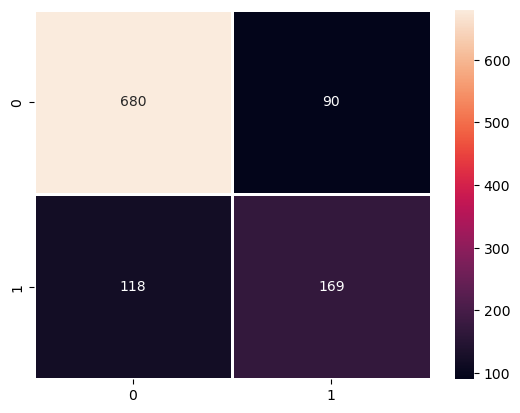

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm2=confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, linewidths=1, annot=True, fmt='g')

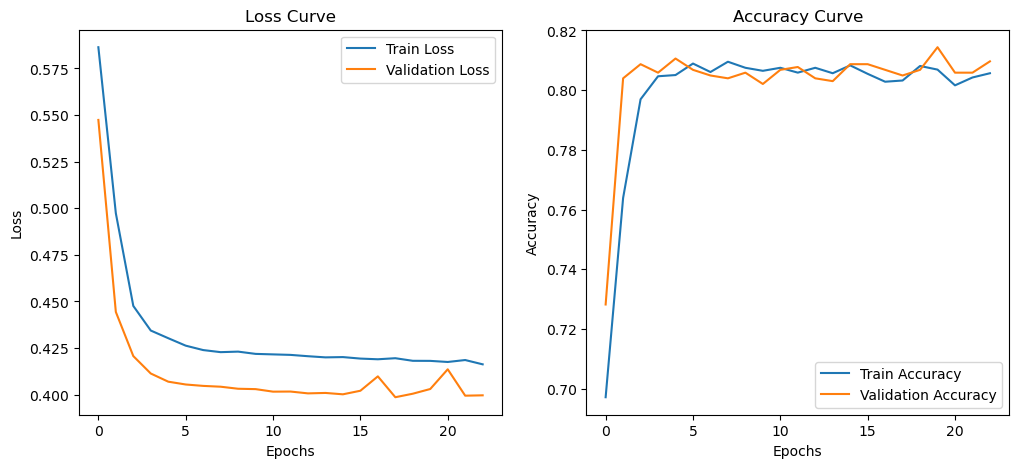

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
y_pred =[1 if y_pred[aa]>=0.5 else 0 for aa in range(len(y_pred)) ]
print(y_pred[:5])

[0, 1, 0, 0, 0]


In [25]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       770
           1       0.65      0.59      0.62       287

    accuracy                           0.80      1057
   macro avg       0.75      0.74      0.74      1057
weighted avg       0.80      0.80      0.80      1057

